In [33]:
# Failide uploadimine
from google.colab import files
uploaded = files.upload()

Saving olympic100m2024.csv to olympic100m2024.csv


In [48]:
import os
# Loetleb kõik failid ja kaustad /content kataloogis
print(os.listdir('/content'))

['.config', 'olympic100m.csv', 'olympic100m (1).csv', 'olympic100m2024.csv', 'sample_data']


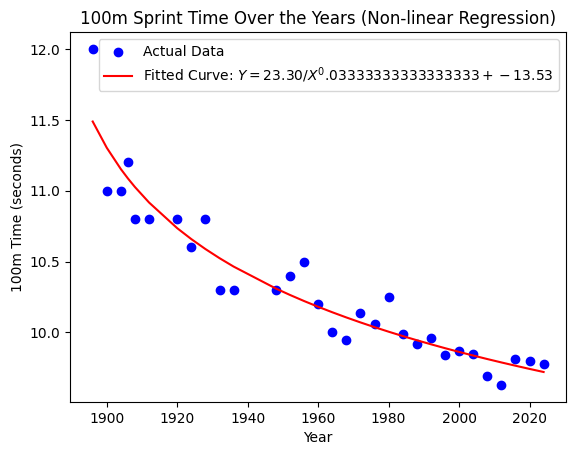

Predicted 100m time in 2028: 9.70 seconds
Predicted 100m time in 2032: 9.68 seconds
Predicted 100m time in 2036: 9.66 seconds
Predicted 100m time in 2040: 9.64 seconds


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the model function
def model_func(x, a, n, b):
    return a / (x ** n) + b

# Samm 1: Andmete lugemine CSV-failist
df = pd.read_csv('olympic100m2024.csv')

# Samm 2: Andmete eraldamine omadusteks (X) ja sihtmuutujaks (y)
years = df['year'].values
times = df['time'].values

# Samm 3: Andmete skaleerimine vahemikku [0, 1]
min_year = 1880
max_year = 2016
X = (years - min_year) / (max_year - min_year)

# Define the model function with fixed n value
def model_func_fixed_n(x, a, b, n):
    return a / (x ** n) + b

# Define n value
n_value = 1/30  # Näiteks, n väärtus

# Initial guess for parameters: a=100, b=10
initial_guess = [100, 10]

# Samm 4: Sobitage mudel andmetega
try:
    popt, pcov = curve_fit(lambda x, a, b: model_func_fixed_n(x, a, b, n_value), X, times, p0=initial_guess)
except RuntimeError as e:
    print(f"Error occurred: {e}")
    popt = [np.nan, np.nan]

# Sobitatud parameetrid
a, b = popt if not np.isnan(popt).any() else (0, 0)

# Samm 5: Prognoosimine andmete põhjal
y_pred = model_func_fixed_n(X, a, b, n_value)

# Samm 6: Visualiseerimine
plt.scatter(X * (max_year - min_year) + min_year, times, color='blue', label='Actual Data')  # Convert X back to original year scale for plotting
plt.plot(X * (max_year - min_year) + min_year, y_pred, color='red', label=f'Fitted Curve: $Y = {a:.2f}/X^{n_value} + {b:.2f}$')
plt.xlabel('Year')
plt.ylabel('100m Time (seconds)')
plt.title('100m Sprint Time Over the Years (Non-linear Regression)')
plt.legend()
plt.show()

# Samm 7: Prognoosi tegemine tuleviku jaoks
future_years = np.array([2028, 2032, 2036, 2040])
future_X = (future_years - min_year) / (max_year - min_year)
future_predictions = model_func_fixed_n(future_X, a, b, n_value)

for year, time in zip(future_years, future_predictions):
    print(f"Predicted 100m time in {year}: {time:.2f} seconds")
